---

The aim of the project is to develope a customer interaction strategy based on analytical data for gym chain Model Fitness.<br>
First we will preprocess the data and study it: <br>
  - find missing values and duplicates <br>
  - look into features distribution depending on the churn.  <br>
  
We will develope a model for predicting the probability of churn (for the upcoming month) for each customer. <br>
Draw up typical user portraits: select the most outstanding groups and describe their main features <br>
Analyze the factors that impact churn most <br>
<br>
Finally we will draw basic conclusions and develop recommendations on how to improve customer service: <br>
- Identify target groups <br>
- Suggest measures to cut churn <br>.

<a id='top'></a>

# Table of contents:

Step 1. [Data preprocessing](#1) <br>
[Reading the data base](#2)<br>
[Renaming columns ](#3)<br>
[Checking and changing the data types  ](#4)<br>
[Checking for duplicated data](#5)<br>
[Checking for missing values](#6)<br>
Step 2. [Exploratory data analysis (EDA)](#7)<br>
[Statistical summary of the data](#8)<br>
[Splitting the data in two groups: left and stayed customers](#9)<br>
[Feature distributions for those who left (churn) and those who stayed](#10)<br>
[Correlation matrix](#11)<br>
Step 3. [Build a model to predict user churn](#12)<br>
[Dividing the data into train and validation sets ](#13)<br>
[Logistic Regression model](#14)<br>
[Random Forest model](#14)<br>
Step 4. [User clusters](#15)<br>
[Data Standardization ](#16)<br>
[Model visualization ](#17)<br>
[K-Means Clustering ](#18)<br>
[Features distribution for clusters ](#19)<br>
[Churn rate for clusters ](#20)<br>
[General conclusion and recommendations ](#21)<br>

In [1]:
import pandas as pd
from IPython.display import display
import plotly.express as px
from plotly import graph_objects as go
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from numpy import median
from scipy import stats as st
import seaborn as sns
import math 
from plotly.subplots import make_subplots
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
 

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

In [3]:
from scipy.cluster import hierarchy
from matplotlib.pyplot import cm

In [4]:
pip install seaborn --upgrade

  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.0
    Uninstalling seaborn-0.11.0:
      Successfully uninstalled seaborn-0.11.0



In [5]:
sns.__version__

'0.11.0'

# Part 1.  Data preprocessing <a id='1'></a>

 [next part](#2) 

### Reading the data base <a id='2'></a>

In [6]:
df = pd.read_csv('./gym_churn_us.csv')
display(df.head())

gender  Near_Location  Partner  Promo_friends  Phone  Contract_period  \
0       1              1        1              1      0                6   
1       0              1        0              0      1               12   
2       0              1        1              0      1                1   
3       0              1        1              1      1               12   
4       1              1        1              1      1                1   

   Group_visits  Age  Avg_additional_charges_total  Month_to_end_contract  \
0             1   29                     14.227470                    5.0   
1             1   31                    113.202938                   12.0   
2             0   28                    129.448479                    1.0   
3             1   33                     62.669863                   12.0   
4             0   26                    198.362265                    1.0   

   Lifetime  Avg_class_frequency_total  Avg_class_frequency_current_month  \
0         3                   0.020398                           0.000000   
1         7                   1.922936                           1.910244   
2         2                   1.859098                           1.736502   
3         2                   3.205633                           3.357215   
4         3                   1.113884                           1.120078   

   Churn  
0      0  
1      0  
2      0  
3      0  
4      0

In [7]:
display(df.sample(6))

gender  Near_Location  Partner  Promo_friends  Phone  Contract_period  \
29         0              1        1              1      1                6   
766        0              1        0              1      1                1   
1003       1              1        1              1      1                6   
2237       0              1        1              1      1               12   
2188       0              1        1              1      1                6   
129        0              1        0              0      1               12   

      Group_visits  Age  Avg_additional_charges_total  Month_to_end_contract  \
29               1   27                    159.148924                    5.0   
766              0   29                    243.365528                    1.0   
1003             0   28                     13.586564                    6.0   
2237             1   26                    245.341986                   12.0   
2188             1   29                    301.907485                    6.0   
129              1   28                      5.865051                    9.0   

      Lifetime  Avg_class_frequency_total  Avg_class_frequency_current_month  \
29           3                   3.511568                           3.528886   
766          7                   2.431410                           2.284297   
1003         1                   3.316066                           3.273928   
2237         5                   3.342234                           3.302304   
2188         5                   1.025029                           1.110048   
129          7                   1.352800                           1.316759   

      Churn  
29        0  
766       0  
1003      0  
2237      0  
2188      0  
129       0

### Renaming columns  <a id='3'></a>

In [8]:
#getting rid of the upper case lettres
df.columns = df.columns.str.lower()
df.sample(6)

gender  near_location  partner  promo_friends  phone  contract_period  \
520        0              1        0              0      1                1   
3663       1              1        0              0      1               12   
2489       1              1        1              1      1               12   
2092       1              1        0              0      1                1   
130        1              1        1              1      1               12   
911        0              0        0              0      1                1   

      group_visits  age  avg_additional_charges_total  month_to_end_contract  \
520              0   27                    115.800883                    1.0   
3663             1   27                    334.472656                    7.0   
2489             1   26                    199.501236                   12.0   
2092             1   33                     29.741681                    1.0   
130              0   28                    243.820700                   12.0   
911              0   32                    243.777010                    1.0   

      lifetime  avg_class_frequency_total  avg_class_frequency_current_month  \
520          1                   1.029153                           0.000000   
3663         0                   3.684876                           3.672933   
2489         5                   0.000000                           0.000000   
2092         1                   2.407860                           1.575433   
130          4                   0.915233                           0.850286   
911          2                   0.643102                           0.116537   

      churn  
520       1  
3663      0  
2489      0  
2092      1  
130       0  
911       1

### Checking and changing the data types  <a id='4'></a>

In [9]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   float64
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

### Checking for duplicated data <a id='5'></a>

In [10]:
#Checking for duplicated data
df.duplicated().sum()
print('There are', df.duplicated().sum(), 'duplicates in the data set.')

There are 0 duplicates in the data set.


### Checking for missing values <a id='6'></a>

In [11]:
# checking for missing values in the data set
df.isnull().sum()

gender                               0
near_location                        0
partner                              0
promo_friends                        0
phone                                0
contract_period                      0
group_visits                         0
age                                  0
avg_additional_charges_total         0
month_to_end_contract                0
lifetime                             0
avg_class_frequency_total            0
avg_class_frequency_current_month    0
churn                                0
dtype: int64

In [12]:
df.shape

(4000, 14)

### Conclusion

The data for analysis contains 14 rows with 4000 entries; data on characteristics (features) and churn for 4000 unique users.<br>
The data does not have any missing values or duplicates. <br>
We have renamed the columns using clear names without upper case letters. <br>

# Step 2. Exploratory data analysis (EDA)  <a id='7'></a>

 [back to top](#top) 

### Statistical summary of the data  <a id='8'></a>

In [13]:
#statistical summary for numerical variables
df.describe().round(2)

gender  near_location  partner  promo_friends   phone  \
count  4000.00        4000.00  4000.00        4000.00  4000.0   
mean      0.51           0.85     0.49           0.31     0.9   
std       0.50           0.36     0.50           0.46     0.3   
min       0.00           0.00     0.00           0.00     0.0   
25%       0.00           1.00     0.00           0.00     1.0   
50%       1.00           1.00     0.00           0.00     1.0   
75%       1.00           1.00     1.00           1.00     1.0   
max       1.00           1.00     1.00           1.00     1.0   

       contract_period  group_visits      age  avg_additional_charges_total  \
count          4000.00       4000.00  4000.00                       4000.00   
mean              4.68          0.41    29.18                        146.94   
std               4.55          0.49     3.26                         96.36   
min               1.00          0.00    18.00                          0.15   
25%               1.00          0.00    27.00                         68.87   
50%               1.00          0.00    29.00                        136.22   
75%               6.00          1.00    31.00                        210.95   
max              12.00          1.00    41.00                        552.59   

       month_to_end_contract  lifetime  avg_class_frequency_total  \
count                4000.00   4000.00                    4000.00   
mean                    4.32      3.72                       1.88   
std                     4.19      3.75                       0.97   
min                     1.00      0.00                       0.00   
25%                     1.00      1.00                       1.18   
50%                     1.00      3.00                       1.83   
75%                     6.00      5.00                       2.54   
max                    12.00     31.00                       6.02   

       avg_class_frequency_current_month    churn  
count                            4000.00  4000.00  
mean                                1.77     0.27  
std                                 1.05     0.44  
min                                 0.00     0.00  
25%                                 0.96     0.00  
50%                                 1.72     0.00  
75%                                 2.51     1.00  
max                                 6.15     1.00

Checking what kind of values some features contain:

In [14]:
df['contract_period'].value_counts()

1     2207
12     960
6      833
Name: contract_period, dtype: int64

In [15]:
labels = df['contract_period']
values = df['contract_period'].value_counts()
fig = go.Figure(data=[go.Pie(labels=labels, values=values, opacity = 0.75)])
fig.update_layout(title_text='Shares of different types of contracts')
fig.show()

55% of customers buy short-term contracts (1 month), shares of yearly contracts and 6-months contntracts are almost the same (21-24%) respectively. These numbers will influence the churn rate on the lifetime period.<br>
<br>
Checking for outliers:

In [16]:
#Calculatinug the 95th and 99th percentiles for the number of contract period (setting out outliers). 
np.percentile(df['age'], [95, 99])

array([34., 37.])

In [17]:
#Calculatinug the 95th and 99th percentiles for the number of additional_charges (setting out outliers). 
np.percentile(df['avg_additional_charges_total'], [95, 99])

array([323.44087589, 400.99612505])

In [18]:
#Calculatinug the 95th and 99th percentiles for the number avg_class_frequency (setting out outliers). 
np.percentile(df['avg_class_frequency_total'], [95, 99])

array([3.53564837, 4.19757925])

The age of users vary vary from 18 to 41 years old. Middle 50% of users are from 27 to 31 years old. 

Not more than 1% of users are over 37 yeras old. Thus users elder than 37 years old are outliers for our distribution. 

Middle 50% of customers spend from USD 69 to 211 during their contract period. Only 1% of customers spend over USD 400.

Middle 50% of customers get to the gym 1-2.5 times a week. Only 5% of customers visit gym more than 3 times a week, and only 1% - more than 4 times a week.

### Splitting the data in two groups: left and stayed customers <a id='9'></a>

 [back to top](#top) 

 [previous part](#8) 

The data split into customers that churn and those who did not:

In [19]:
#creating a table 
df_churn_split = df.groupby('churn').mean()
df_churn_split.round(2).T

churn                                   0       1
gender                               0.51    0.51
near_location                        0.87    0.77
partner                              0.53    0.36
promo_friends                        0.35    0.18
phone                                0.90    0.90
contract_period                      5.75    1.73
group_visits                         0.46    0.27
age                                 29.98   26.99
avg_additional_charges_total       158.45  115.08
month_to_end_contract                5.28    1.66
lifetime                             4.71    0.99
avg_class_frequency_total            2.02    1.47
avg_class_frequency_current_month    2.03    1.04

Among those who left and who stayed the percentage of men and women is the same, gender do not impact the churn rate. Those who live far churn more. People that buy short contracts (1-6 months) tend to churn more. Younger people (27 years old on average) churn more; as well as those who have fewer visits per week and spend less money additionally in the gym. 

### Feature distributions for those who left (churn) and those who stayed <a id='10'></a>

 [back to top](#top) 

 [previous part](#9) 

Firstly we will have a general view on the features ditribution on pairplots and then look into distrubution of every feature individually. 

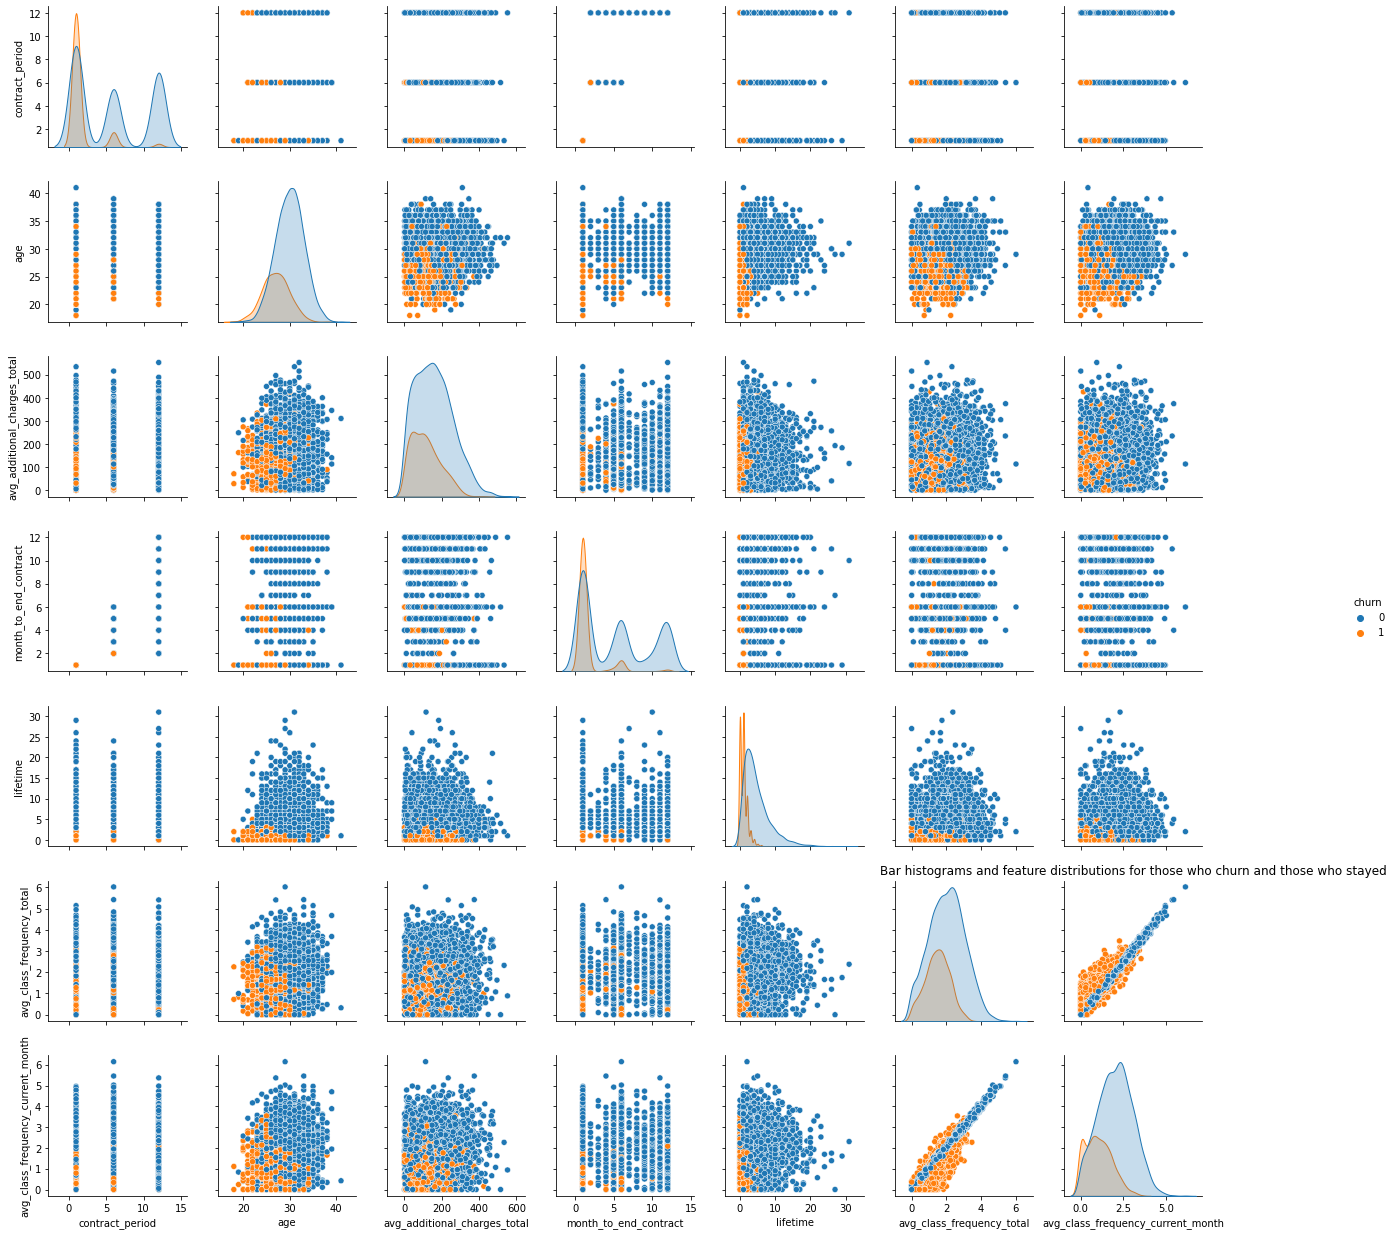

In [20]:
#plotting general view for the non-boolean features
sns.pairplot(df[['contract_period', 'age', 'avg_additional_charges_total', 'month_to_end_contract', 
                'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month', 'churn']], hue='churn') 
plt.title('Bar histograms and feature distributions for those who churn and those who stayed')
plt.show()

General view of the pairplots prove the early conclusions. Features of those who churn more are as follows:<br>
 - live far from gym,  <br>
 - younger (27 yeras on average), <br>
 - are not emplyees of gym partners, <br>
 - came alone, <br>
 - bought shrt-term contracts,<br>
 - did not have group visits, <br>
 - did not buy additional services in gym, <br>
 - have less than 2 months till the end of the contract, <br>
 - visit gym not more than 1-2 times  a week.<br>




Next we will split the db and ajust them for visualisation of distribution and plot the charts. 

In [21]:
#creating separete db for users that churn 
df_churn = df.query('churn==1').drop(['churn'], axis = 1) 
df_churn.shape

(1061, 13)

In [22]:
#creating separete db for users that didn't churn 
df_stayed = df.query('churn!=1').drop(['churn'], axis = 1) 
df_stayed.shape

(2939, 13)

In [23]:
df_categorical = df[['gender', 'age','near_location', 'partner', 'promo_friends', 'phone', 'group_visits', 'month_to_end_contract', 'lifetime', 'churn']]


In [24]:
#adding column for counting 
df_categorical.insert(0, "count", 1)

In [25]:
df_categorical['gender'] = df_categorical['gender'].replace(to_replace=0, value ="female").replace(to_replace=1, value ="male")
df_categorical['near_location'] = df_categorical['near_location'].replace(to_replace=0, value ="far").replace(to_replace=1, value ="near")
df_categorical['partner'] = df_categorical['partner'].replace(to_replace=0, value ="not_partner").replace(to_replace=1, value ="partner")
df_categorical['churn'] = df_categorical['churn'].replace(to_replace=0, value ="stayed").replace(to_replace=1, value ="left")
df_categorical['promo_friends'] = df_categorical['promo_friends'].replace(to_replace=0, value ="alone").replace(to_replace=1, value ="through_friends")
df_categorical['phone'] = df_categorical['phone'].replace(to_replace=0, value ="no_phone").replace(to_replace=1, value ="with_phone")
df_categorical['group_visits'] = df_categorical['group_visits'].replace(to_replace=0, value ="no_group_visits").replace(to_replace=1, value ="with_group_visits")

In [26]:
df_hist = df[['avg_additional_charges_total', 'avg_class_frequency_total', 'avg_class_frequency_current_month', 'churn']]

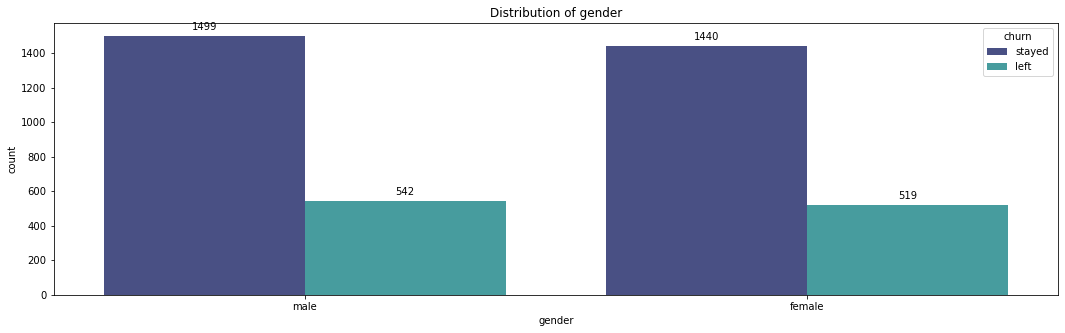

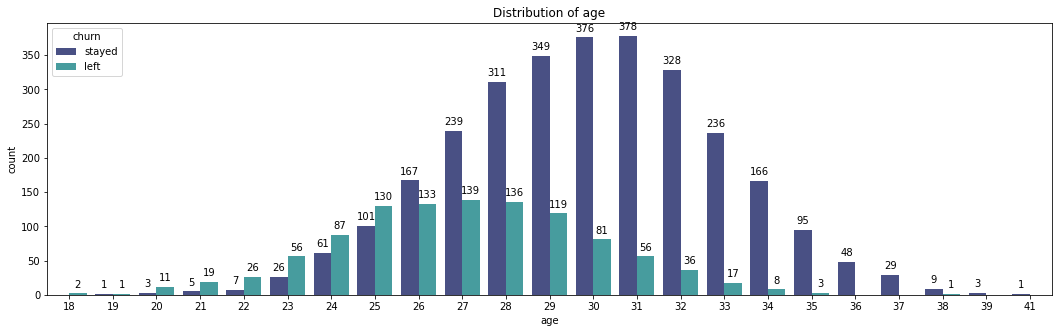

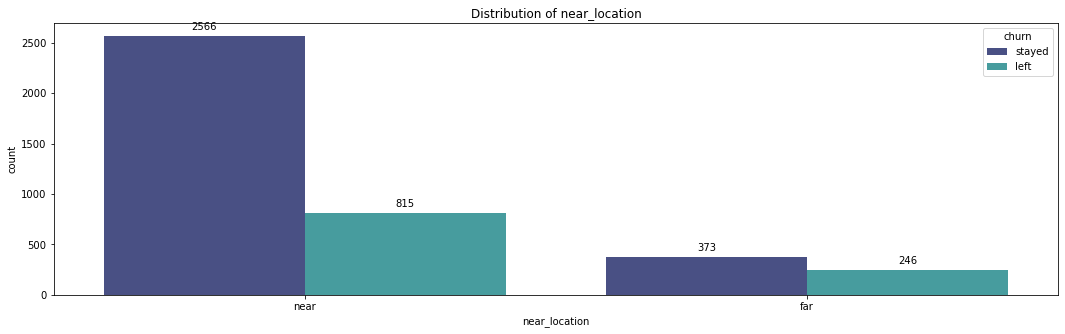

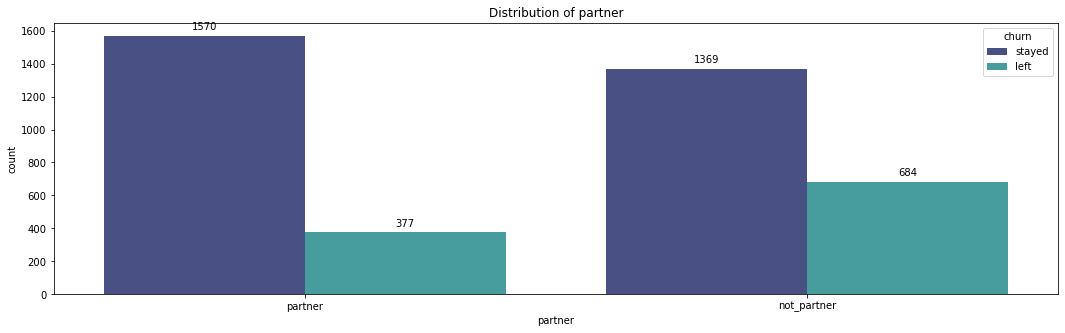

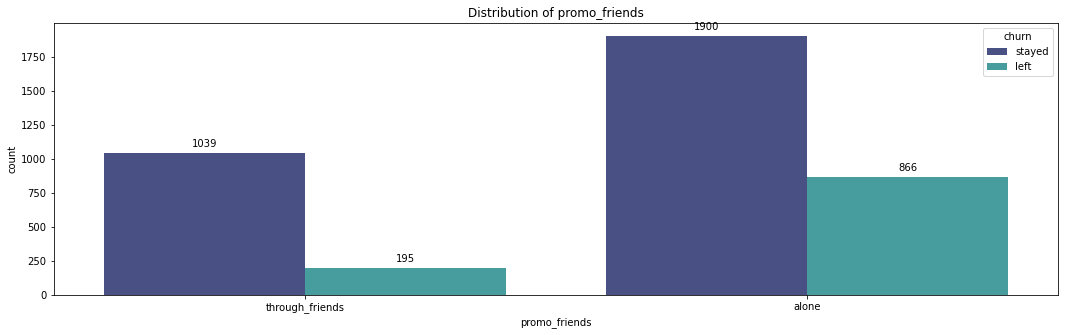

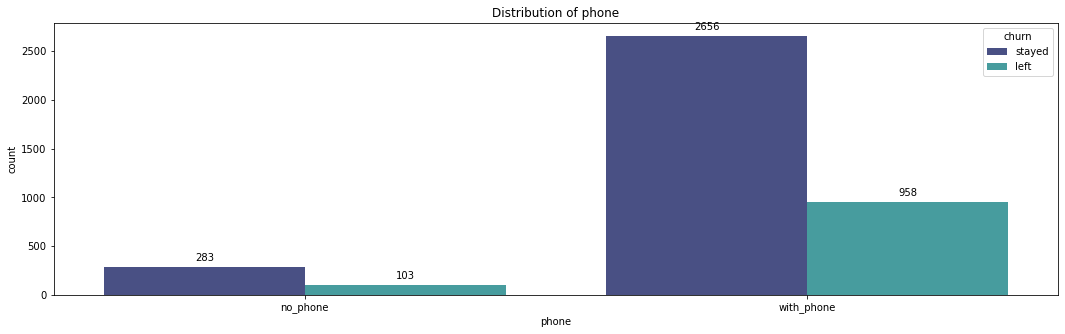

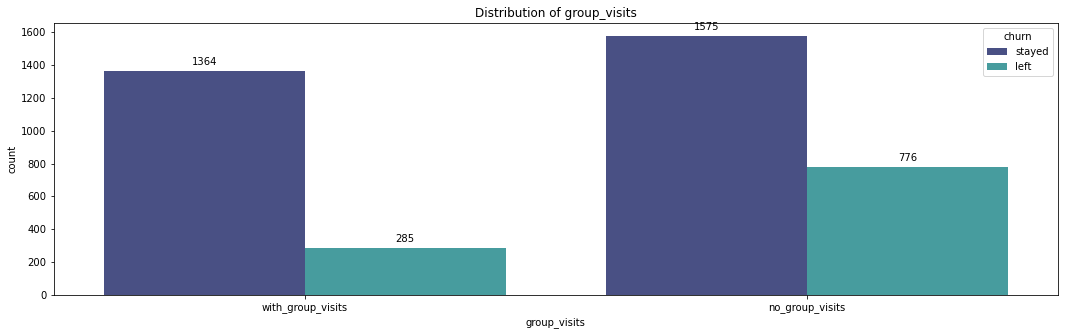

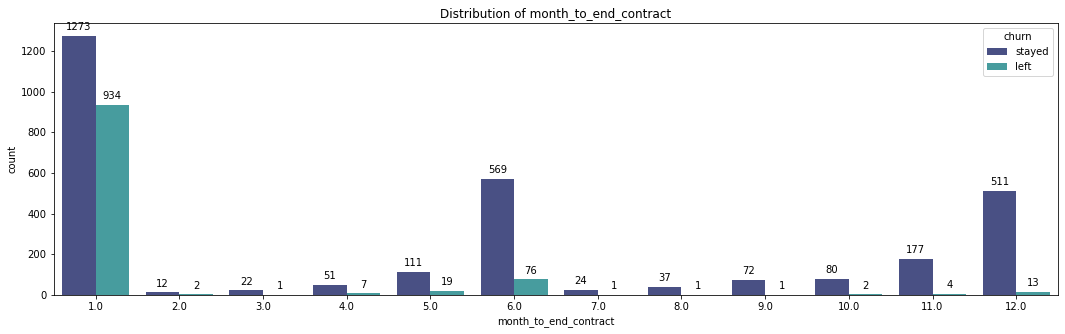

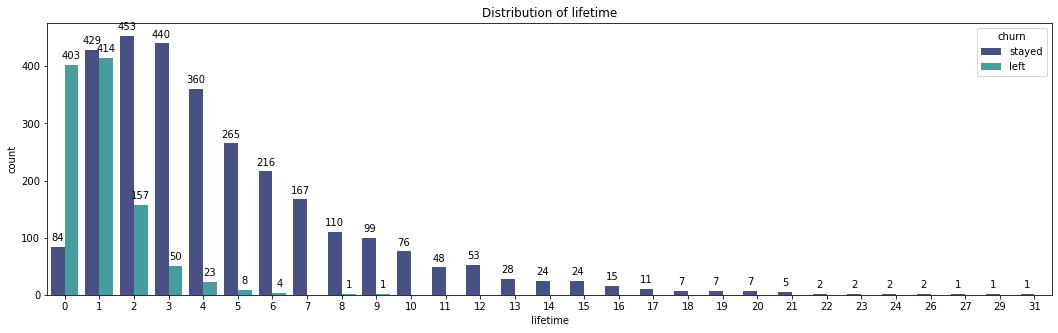

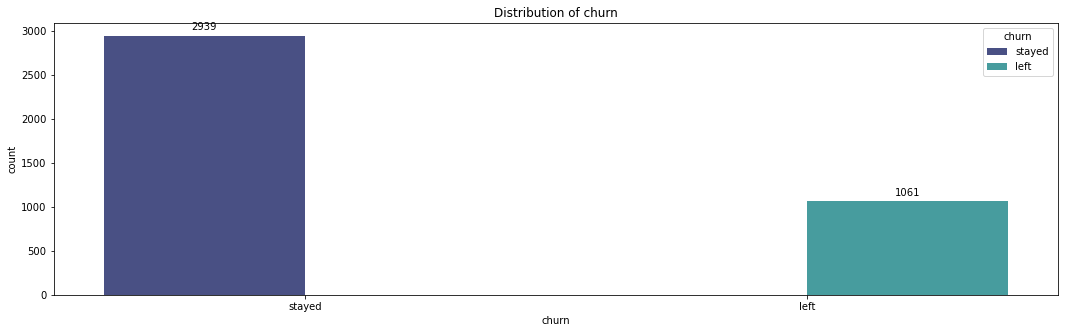

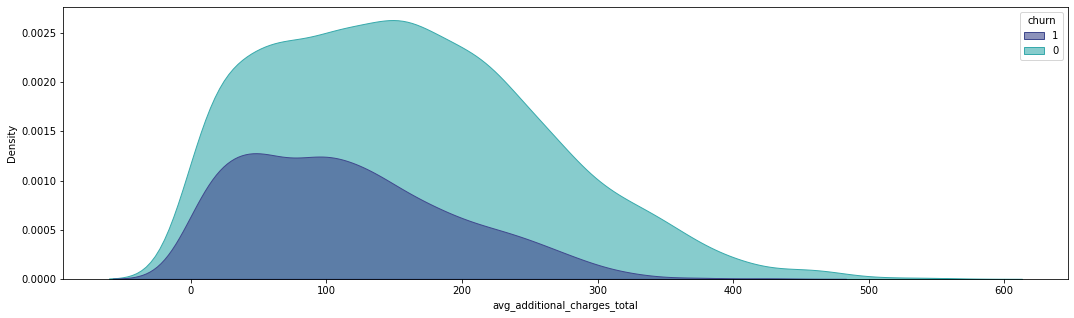

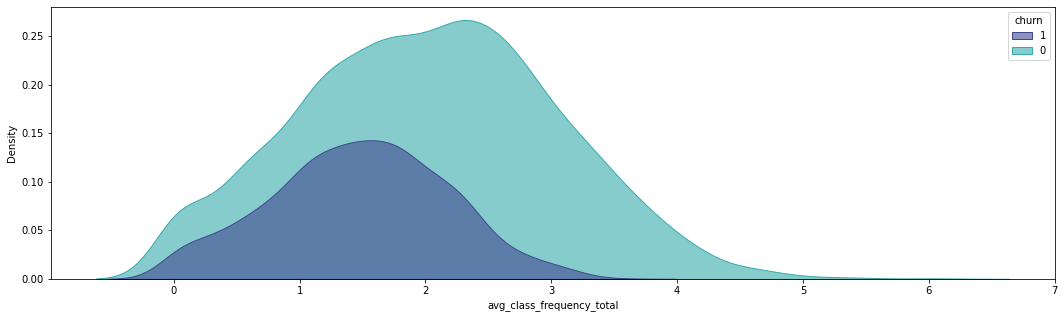

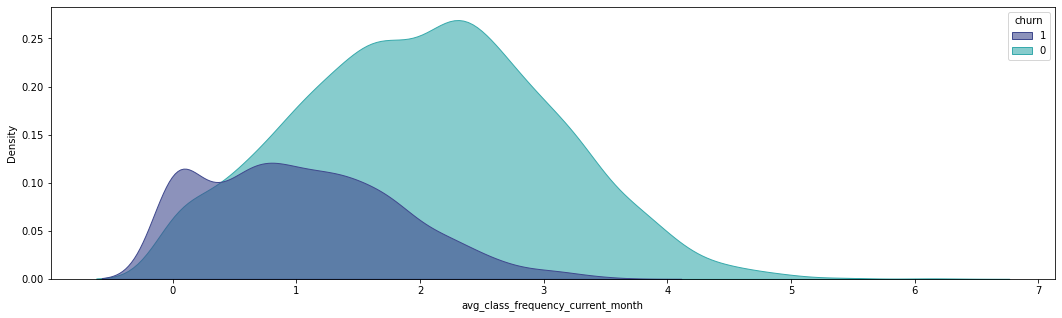

In [27]:
parameters = ['gender', 'age', 'near_location', 'partner',
              'promo_friends', 'phone', 'group_visits', 'month_to_end_contract', 'lifetime', 'churn']
parameters_dis = ['avg_additional_charges_total', 'avg_class_frequency_total', 'avg_class_frequency_current_month']

for x in parameters:
    plt.figure(figsize=(18,5))
    ax = sns.barplot(x=x, y="count", data=df_categorical, hue='churn', estimator=sum, palette="mako") 
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    
    plt.title('Distribution of {}'.format(x))        
    plt.show()
            
for x in parameters_dis:
    plt.figure(figsize=(18,5))
    sns.kdeplot(data=df_hist, x=x, hue="churn", hue_order=[1,0], alpha = 0.6 , palette="mako", fill=True)       
    plt.show()

### Conclusion

The chart and the table gave us the following information: <br>

Number of men is slightly more than women, churn rate is the same regardless gender. <br>
Middle 50% of the customers are between 27 and 31 years old, the younger customers churn more. Starting from age 28-29 and up percentage of  customers that stay is bigger than those who left. <br>
Those who live far from the gyms churn more. <br>
Likewise when  users are employees of a partner company they chen less. <br>
There munber of customers that were brought to the gym by their friends is almost twice smaller than the number of those who came alone. But the churn rate among those with friend is much lower. <br>
Mostly customers tend to share the contact information with their gym; the churn rate among those without contact information is expectidly higher. <br>
People that made no group visits churn more.  <br>
Generally the highest churn rate is among those who have 1 month left till the end of their contract. Next popular waves of churn are: 6 months, 5 months and 12 months (right after the signing of contract) prior to the end of contract.  <br>
Average level of charges is less among those who churn; people thay stay tend to spend more on gym additional gym services:cafe, athletic goods, cosmetics, massages, etc. <br>
Middle 50% of customers spend from USD 69 to 211 during their contract period. Only 1% of customers spend over USD 400. <br>
The higher frequency of the visits the less customers curn. <br>

### Correlation matrix <a id='11'></a>

 [back to top](#top) 

 [previous part](#10) 

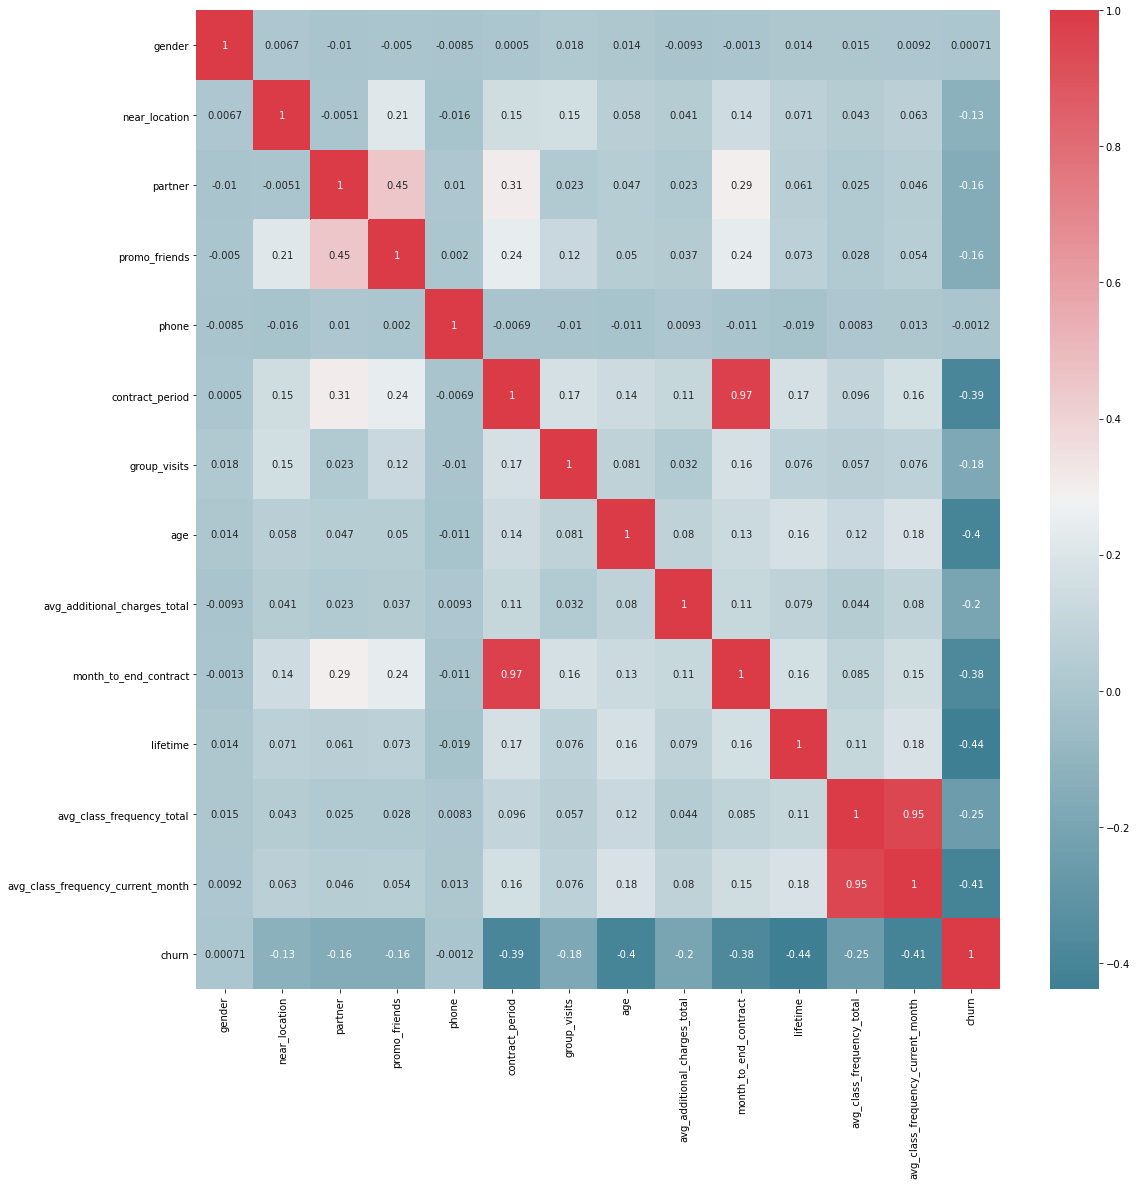

In [28]:
#defining correlation between the features
corr = df.corr()
plt.figure(figsize=(18,18))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True,
            cmap=sns.diverging_palette(220, 10, as_cmap=True))
plt.show()

The matrix shows that we have 2 pairs of itercorrelated features: month_to_end_contract with contract_period and avg_class_frequency_current_month with avg_class_frequency_current_total. One of the features in every couple can be omitted in the model. 

# Step 3. Build a model to predict user churn <a id='12'></a>

### Dividing the data into train and validation sets <a id='13'></a>

In [29]:
#dropping extra columns of duplicated features and target variable column
X = df.drop(['churn', 'avg_class_frequency_current_month', 'contract_period'] , axis = 1)
y = df['churn']

In [30]:
X.columns

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'group_visits', 'age', 'avg_additional_charges_total',
       'month_to_end_contract', 'lifetime', 'avg_class_frequency_total'],
      dtype='object')

In [31]:
# divide the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Logistic Regression model <a id='14'></a>

In [32]:
lr_model = LogisticRegression(random_state=0)
# training the model
lr_model.fit(X_train, y_train)
# use the trained model to make predictions
lr_predictions = lr_model.predict(X_test)
lr_probabilities = lr_model.predict_proba(X_test)[:,1]

### Random Forest model <a id='14'></a>

In [33]:
# defining the new model's algorithm based on the random forest algorithm
rf_model = RandomForestClassifier(n_estimators = 100, random_state=0)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_probabilities = rf_model.predict_proba(X_test)[:,1]

In [34]:
def print_all_metrics(y_true, y_pred, y_proba, title = 'Classification metrics'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tF1: {:.2f}'.format(f1_score(y_true, y_pred)))
    print('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_true, y_proba)))

# printing all metrics for both models:
print_all_metrics(y_test, lr_predictions, lr_probabilities , title='Metrics for logistic regression:')
print_all_metrics(y_test, rf_predictions, rf_probabilities, title = 'Metrics for random forest:')

Metrics for logistic regression:
	Accuracy: 0.88
	Precision: 0.75
	Recall: 0.74
	F1: 0.75
	ROC_AUC: 0.94
Metrics for random forest:
	Accuracy: 0.90
	Precision: 0.80
	Recall: 0.77
	F1: 0.79
	ROC_AUC: 0.94


Now we will create a separate data base with models metrics results to visualise them and choo the better one. 

In [35]:
#creating a function 
def metrics(y_true, y_pred, y_proba):
    all_metrics = []
    all_metrics.append(accuracy_score(y_true, y_pred))
    all_metrics.append(precision_score(y_true, y_pred))
    all_metrics.append(recall_score(y_true, y_pred))
    all_metrics.append(f1_score(y_true, y_pred))
    all_metrics.append(roc_auc_score(y_true, y_proba))
    return all_metrics

In [36]:
lr_metrics = metrics(y_test, lr_predictions, lr_probabilities)

In [37]:
rf_metrics = metrics(y_test, rf_predictions, rf_probabilities)

In [38]:
#Creating a db for visualisation of results:
metrics_list = ['accuracy_score', 'precision_score', 'recall_score', 'f1_score', 'roc_auc_score']
data={'metrics': metrics_list, 'LogisticRegression': lr_metrics, 'RandomForestClassifier':rf_metrics
        }
df_models = pd.DataFrame(data, columns = ['metrics', 'LogisticRegression', 'RandomForestClassifier'])

print (df_models) 


           metrics  LogisticRegression  RandomForestClassifier
0   accuracy_score            0.875000                0.896250
1  precision_score            0.750000                0.801047
2     recall_score            0.742424                0.772727
3         f1_score            0.746193                0.786632
4    roc_auc_score            0.938186                0.939226


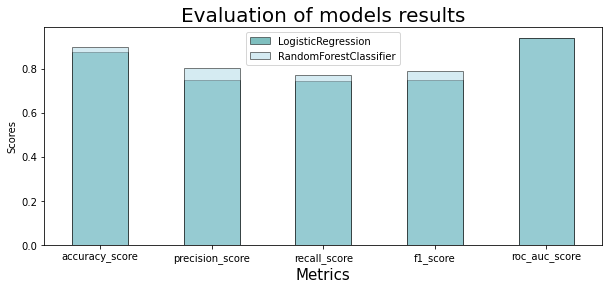

In [39]:
#visualizing results
x0 = df_models['LogisticRegression']
x1 = df_models['RandomForestClassifier']
labels = df_models['metrics']

x = np.arange(len(labels))
fig, ax = plt.subplots(figsize=(10,4))

x0.plot(kind="bar",color="teal",alpha=0.5, edgecolor='k').legend()
x1.plot(kind="bar", color="lightblue", alpha=0.5, edgecolor='k', linewidth=1).legend()

ax.set_ylabel('Scores')
ax.set_xlabel('Metrics', size=15)
ax.set_title('Evaluation of models results', size=20)
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=0)

plt.show()

### Conclusion. 
According to the models' metrics the random forest classifier model represents the target variable in a more accurate way as all the metrics give higher scores.

# Step 4. User clusters <a id='15'></a>

 [back to top](#top) 

 [previous part](#14) 

### Data Standardization <a id='16'></a>

In [40]:
# obligatory standardization of data before passing it to the algorithm
sc = StandardScaler()
X_sc = sc.fit_transform(X)


### Model visualization <a id='17'></a>

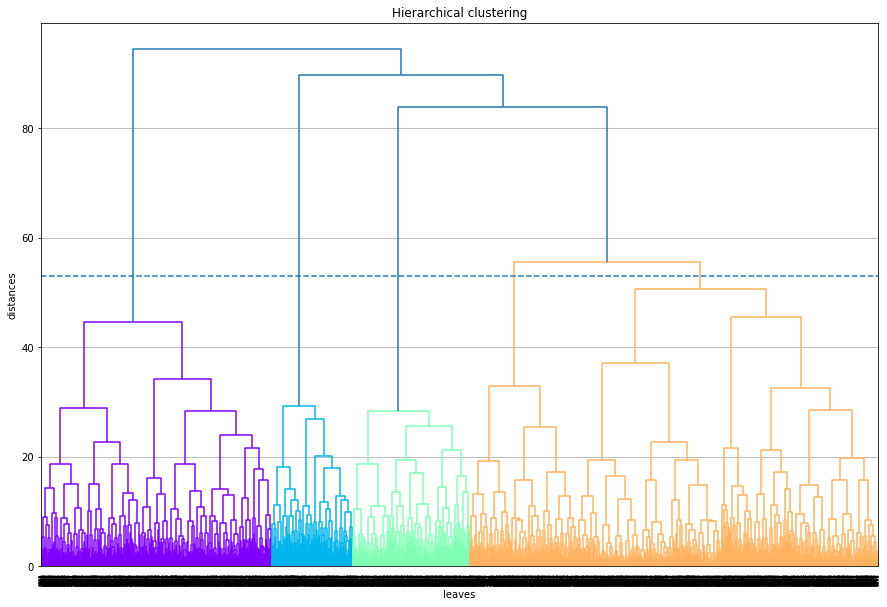

In [41]:
# visualizing with dendrogram plots
linked = linkage(X_sc, method = 'ward') 

cmap = cm.rainbow(np.linspace(0, 1, 5))
hierarchy.set_link_color_palette([mpl.colors.rgb2hex(rgb[:3]) for rgb in cmap])

plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.axhline(linestyle='--', y=53)
plt.grid(axis='y'); plt.xlabel('leaves'); plt.ylabel('distances')
plt.title('Hierarchical clustering')
plt.show() 

As the dendrograms cannot tell us how many clusters we should have, we have settled the number by ourselves (n=5). In the chart this place is marked with a discreet line.  At this place the distance between clusters corresponds to the required number of clusters (5). <br>
Generally speaking we cannot use the dendrogram as a tool for determining the number of clusters in data. But the dendrogram is  most accurate at the bottom, showing which items (leaves) are very similar. Though in our case in is not readable we can get a general impession of the method.<br>

### K-Means Clustering <a id='18'></a>

 [back to top](#top) 

As we have already standartized the data we are defining K-mreans right away:

In [42]:
km = KMeans(n_clusters = 5, random_state=0) # setting the number of clusters as 5
labels = km.fit_predict(X_sc) # applying the algorithm to the data and forming a cluster vector 

In [43]:
# store cluster labels into the field of our dataset
df['cluster'] = labels
 
# print the statistics of the mean feature values per cluster
df_clusters = df.groupby(['cluster']).mean().reset_index()
df_clusters

cluster    gender  near_location   partner  promo_friends  phone  \
0        0  0.523316       0.862694  0.471503       0.305699    0.0   
1        1  0.499109       0.000000  0.488414       0.076649    1.0   
2        2  1.000000       0.995232  0.871275       0.641240    1.0   
3        3  0.000000       0.998800  0.912365       0.638655    1.0   
4        4  0.521361       1.000000  0.000000       0.002172    1.0   

   contract_period  group_visits        age  avg_additional_charges_total  \
0         4.777202      0.427461  29.297927                    144.208179   
1         3.032086      0.235294  28.721925                    137.540009   
2         6.343266      0.467223  29.473182                    148.877176   
3         6.186074      0.451381  29.302521                    153.327058   
4         3.406951      0.422882  29.093411                    146.503417   

   month_to_end_contract  lifetime  avg_class_frequency_total  \
0               4.466321  3.940415                   1.854211   
1               2.853832  3.060606                   1.770413   
2               5.772348  4.205006                   1.900802   
3               5.665066  4.009604                   1.941182   
4               3.188993  3.470673                   1.879344   

   avg_class_frequency_current_month     churn  
0                           1.723967  0.266839  
1                           1.606619  0.399287  
2                           1.816206  0.174017  
3                           1.875403  0.175270  
4                           1.749048  0.320058

The table clearly illustrates that mean values for the most of features differ between the clusters. We will plot the features distribution for every cluster to make it more obvious. 

### Features distribution for clusters <a id='19'></a>

 [back to top](#top) 

First we will ajust the data base and then wisualise the distribution of features fgor every cluster. 

In [44]:
#creating a separate db
df_cl_charts = df

In [45]:
#ajusting the db for visualisation
df_cl_charts['gender'] = df_cl_charts['gender'].replace(to_replace=0, value ="female").replace(to_replace=1, value ="male")
df_cl_charts['near_location'] = df_cl_charts['near_location'].replace(to_replace=0, value ="far").replace(to_replace=1, value ="near")
df_cl_charts['partner'] = df_cl_charts['partner'].replace(to_replace=0, value ="not_partner").replace(to_replace=1, value ="partner")
df_cl_charts['churn'] = df_cl_charts['churn'].replace(to_replace=0, value ="stayed").replace(to_replace=1, value ="left")
df_cl_charts['promo_friends'] = df_cl_charts['promo_friends'].replace(to_replace=0, value ="alone").replace(to_replace=1, value ="through_friends")
df_cl_charts['phone'] = df_cl_charts['phone'].replace(to_replace=0, value ="no_phone").replace(to_replace=1, value ="with_phone")
df_cl_charts['group_visits'] = df_cl_charts['group_visits'].replace(to_replace=0, value ="no_group_visits").replace(to_replace=1, value ="with_group_visits")
df_cl_charts.insert(0, "count", 1)

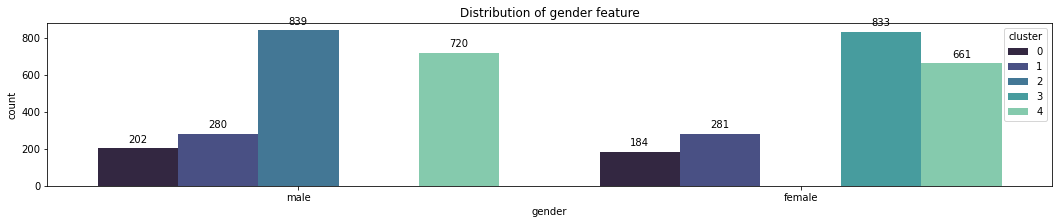

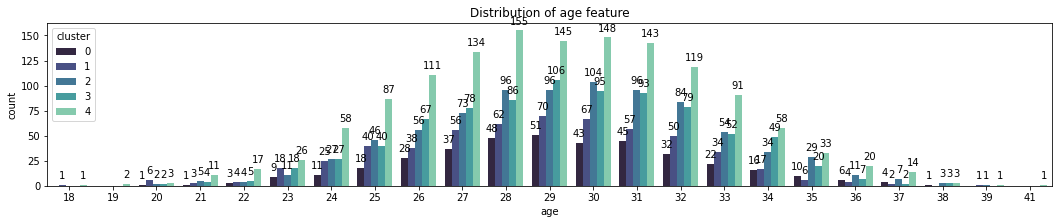

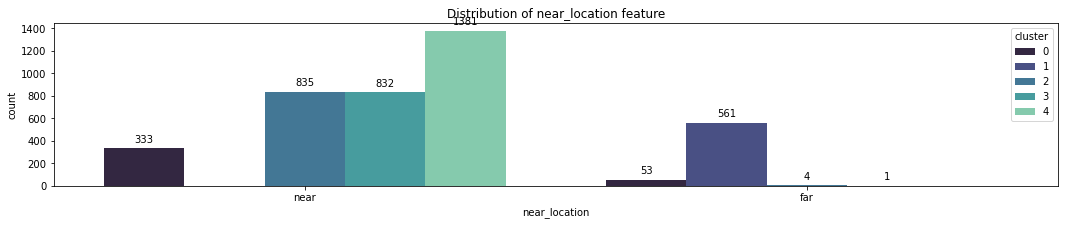

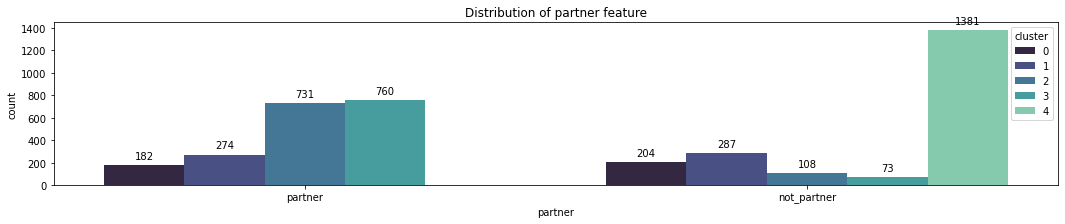

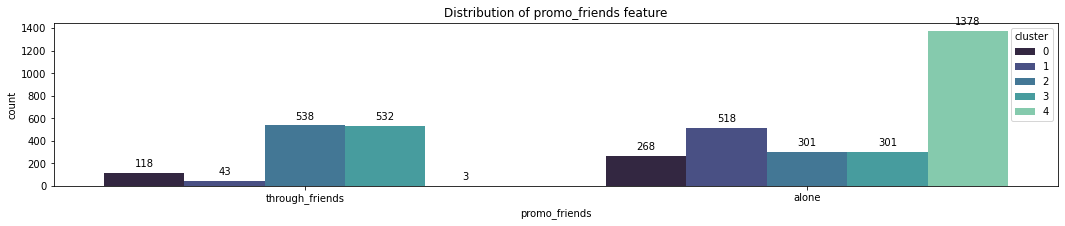

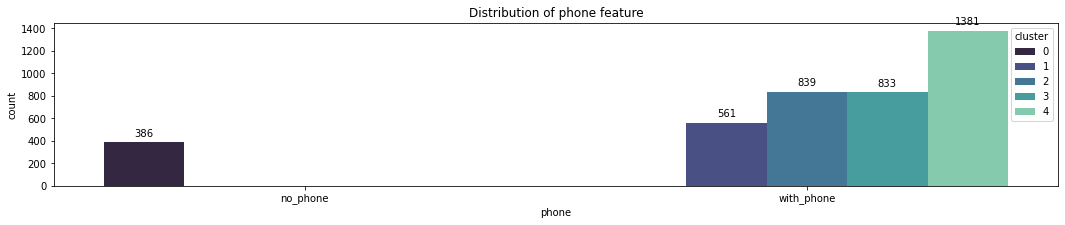

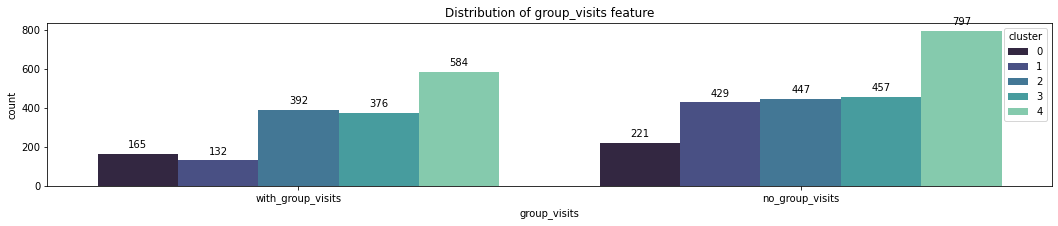

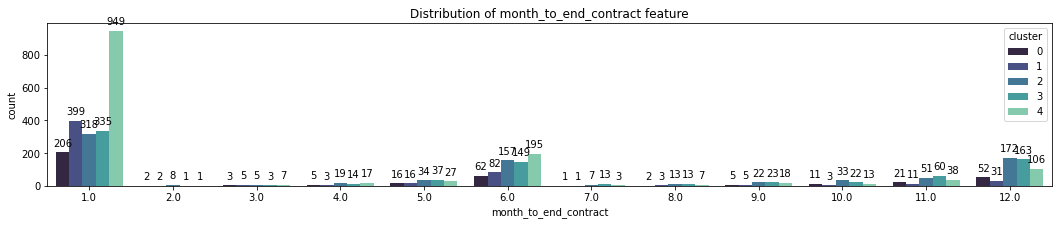

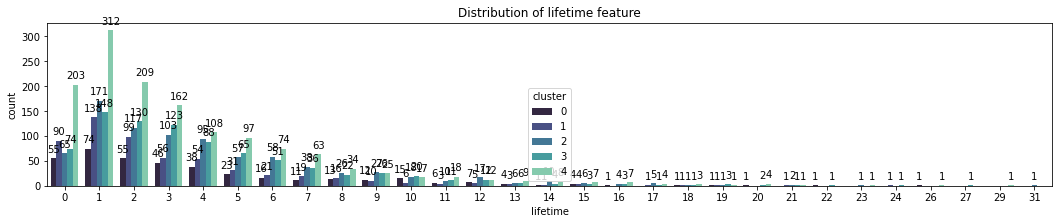

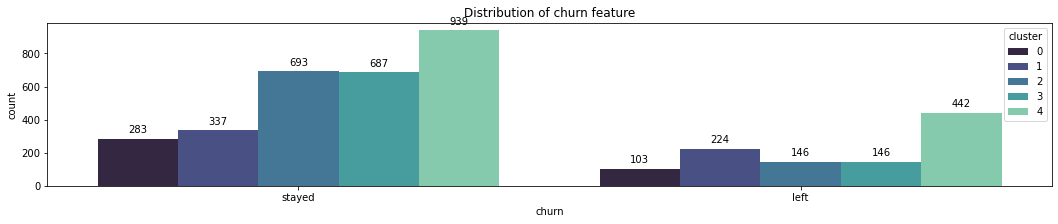

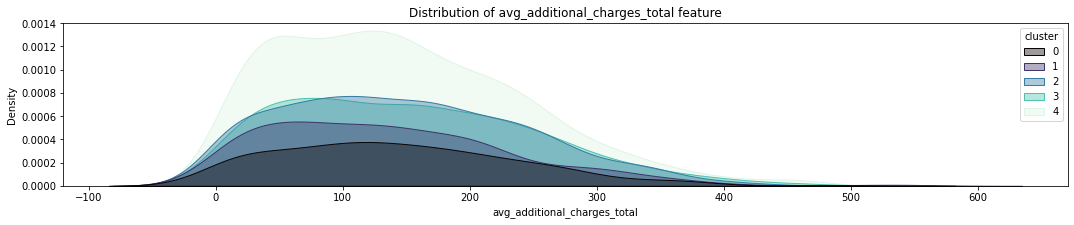

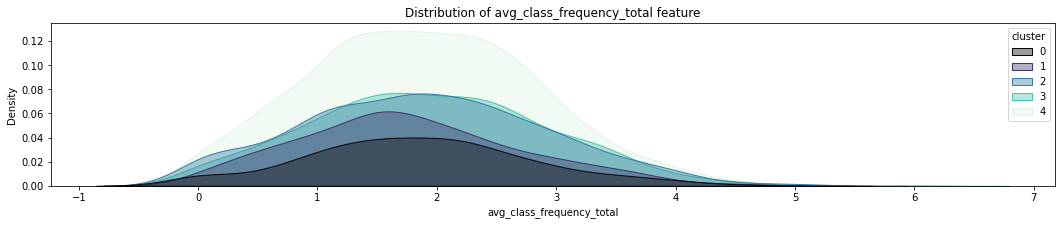

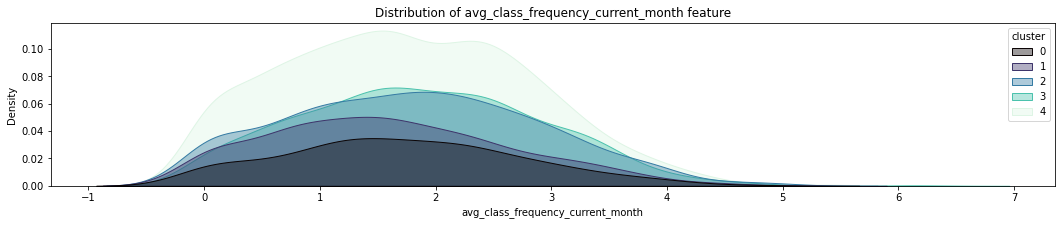

In [46]:
#plotting graphs

parameters_cat = ['gender', 'age', 'near_location', 'partner',
              'promo_friends', 'phone', 'group_visits', 'month_to_end_contract', 'lifetime', 'churn']
parameters_dis = ['avg_additional_charges_total', 'avg_class_frequency_total', 'avg_class_frequency_current_month']

for x in parameters_cat:
    plt.figure(figsize=(18,3))
    ax = sns.barplot(x=x, y="count", data=df_cl_charts, hue='cluster', estimator=sum, palette="mako") 
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    
    plt.title('Distribution of {} feature'.format(x))        
    plt.show()
    
for x in parameters_dis:
    plt.figure(figsize=(18,3))
    sns.kdeplot(data=df_cl_charts, x=x, hue="cluster", alpha = 0.4 , palette="mako", fill=True)
    plt.title('Distribution of {} feature'.format(x))
    plt.show()

### Conclusion

The features have distributed among clusters the following way: <br>
- cluster 2 have only men; cluster 3 contains only women; <br>
- age is distributed evenly amonth clusters;<br>
- cluster 1 has only customers that live far; cluster 4 contains only customers that live near the gym;<br>
- cluster 4 does not include customers that are partners og the gym and got there though the friends;<br>
- cluster 0 contains customers that have not left their phone number to the gym; such customers are not included in other clusters;<br>
- group visits preferencies are olmost evenly distributed among all clusters. <br>
- lifetime and churn featurea re evenly distributed among clusters. <br>
Cluster 0 is the smallest one and cluster 4 is the biggest. <br>

### Churn rate for clusters <a id='20'></a>

 [back to top](#top) 

We are going to calculate and visualize the churn rate for every cluster.

In [47]:
#creating a table and calculating the rate
df_clusters_churn = df_clusters[['cluster','churn']].sort_values(by='churn', ascending=True).reset_index(drop=True)
df_clusters_churn['cluster'] = df_clusters_churn['cluster'].astype(str)
df_clusters_churn['churn'] = df_clusters_churn['churn']*100
df_clusters_churn

cluster      churn
0       2  17.401669
1       3  17.527011
2       0  26.683938
3       4  32.005793
4       1  39.928699

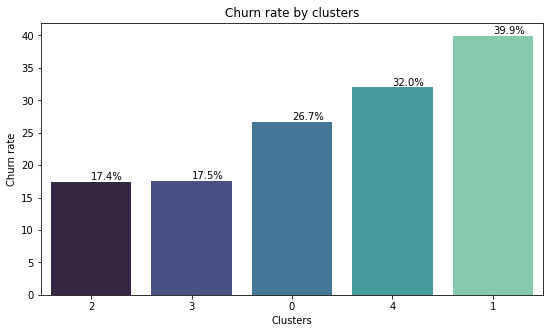

In [48]:
# plotting barh chart 
plt.figure(figsize=(9,5))
ax = sns.barplot(df_clusters_churn.cluster, df_clusters_churn.churn, palette='mako') 
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.set(xlabel="Clusters", ylabel='Churn rate')

ax.set_xticklabels(df_clusters_churn.cluster)
for item in ax.get_xticklabels(): item.set_rotation(0)
for i, v in enumerate(df_clusters_churn["churn"].iteritems()):        
    ax.text(i ,v[1], "{:.1f}%".format(v[1]), color='k', va ='bottom', rotation=0)

plt.title('Churn rate by clusters')
plt.show()

The higest churn rate is in chuster no. 1 (40% of customers churn), clusters 2 and 3 have the lowest churn rate (17.4%-17,5% of customers leave the gyms). <br>
The RF model aggregared 5 groups but we can see that according to the churn rate only 4 have dramatic difference. Thus forming the marketing strategy we can split it into 4 general groups. <br>

# General conclusion and recommendations <a id='21'></a>

 [back to top](#top) 

 [previous part](#19) 

In course of data preprocessing we studied data with 4000 entries and 13 features.<br>
We have:<br>
- checked the data for missing values and duplecates;<br>
- renamed the columns using clear names without upper case letters.<br>

The age of users vary from 18 to 41 years old. Middle 50% of users are from 27 to 31 years old. <br>
Not more than 1% of users are over 37 yeras old. Thus users elder than 37 years old are outliers for our distribution.
Middle 50% of customers spend from USD 69 to 211 during their contract period. Only 1% of customers spend over USD 400.
Middle 50% of customers get to the gym 1-2.5 times a week. Only 5% of customers visit gym more than 3 times a week, and only 1% - more than 4 times a week.<br>
The following people tend to churn more: those who live far from gym, younger ones (27 yeras on average), are not emplyees of gym partners, came alone, bought short-term contracts, did not have group visits, did not buy additional services in gym, who have less than 2 months till the end of the contract, visit gym only 1-2 times a week. <br>
We have defined correlation between the features and defined that we have 2 pairs of itercorrelated features: month_to_end_contract with contract_period and avg_class_frequency_current_month with avg_class_frequency_current_total. One of the features in every couple can be omitted in the model for ML and predictions. <br>
We used two methods for creating ML model using unsupervised ML: Logistic Regression model and Random Forest model (RandomForestClassifier). All metrics proved that the second model is better in representing  the target variable (all the metrics got higher scores). <br>
Next  we defined 5 clusters and looked into feature distribution for every cluster. <br>
As to the churn rate as a target value, it is clearly distinguished between 4 out of 5 clusters.  The higest churn rate is in chuster no. 1 (40% of customers churn), clusters 2 and 3 have the lowest churn rate (17.4%-17,5% of customers leave the gyms). <br>


General recomendations:
1. Main marketring efforts should be aimed at the age group of 27 - 31 years old (they are the middle 50% of the customers). Only 5% of customers are elder than 34 years old. <br>

2. Additional marketing efforts can be channaled into creating additional niche ang generating demand among thouse groups of potential customers that are not in the middle 50% of current customers: <br>
- 18-27 years old, <br>
- over 34 years old.<br>

3. As the highest churn rate is among those who have 1 month left till the end of their contract, additional individual offers should be made to the clients 2-1.5 months prior to the end of their contracts. <br>

And 12 months before the end of the contract (right after the signing it) the gym can offer something to the client to help him turn gym visits into his new routine: <br>
- free individual session with instructor,<br>
- free consultation with a nutrition specialist, <br> 
- composing an individual train program with instructor. <br>

5 months and prior to the end of the contract the gym can offer some bonuses to increase client loyalty and encourage him/her maintain the sports routine:<br>
- free manual specialist session, <br>
- update of the individual training program according to the results of the previous period. <br>

4. Additional efforts should be made to ecourage people to buy side gym services: cafe, athletic goods, cosmetics, massages, etc. As people get more positive experience, assosiate themselves with the gym more, with the certain lifestyle and finally churn less. <br>

5. As the more frequency of the visits the less customers curn, the gym should encourage customets not to skip the training sessions: send phone reminders/calls, personnal contacts with instructors, some bonuse system for every month without skipping sessins.

6. As those who came with friends churn less, the marketing department should launch loyalty programms and  "come with a friend" campaigns.